# Homework 3

In [5]:
import pandas as pd
import numpy as np


In [6]:
import matplotlib.pyplot as plt
import re

In [7]:
# import data here
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [8]:
train_df.shape

(891, 12)

In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
test_df.shape

(418, 11)

In [11]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
# clean and extract data, split into train and test

full_data = [train_df, test_df]

train_df['Name_length'] = train_df['Name'].apply(len)
test_df['Name_length'] = test_df['Name'].apply(len)

train_df['Has_Cabin'] = train_df["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test_df['Has_Cabin'] = test_df["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

    
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train_df['Fare'].median())
train_df['CategoricalFare'] = pd.qcut(train_df['Fare'], 4)

for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
train_df['CategoricalAge'] = pd.cut(train_df['Age'], 5)

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)

    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

for dataset in full_data:
   
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 ;

/Users/manny/opt/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [13]:
# finalize the dataframes

drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = train_df.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)
test  = test_df.drop(drop_elements, axis = 1)

In [14]:
train = train_df.drop(drop_elements, axis = 1)

In [15]:
train.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Name_length,Has_Cabin,FamilySize,IsAlone,CategoricalFare,CategoricalAge,Title
0,0,3,1,1,0,0,0,23,0,2,0,"(-0.001, 7.91]","(16.0, 32.0]",1
1,1,1,0,2,0,3,1,51,1,2,0,"(31.0, 512.329]","(32.0, 48.0]",3
2,1,3,0,1,0,1,0,22,0,1,1,"(7.91, 14.454]","(16.0, 32.0]",2
3,1,1,0,2,0,3,0,44,1,2,0,"(31.0, 512.329]","(32.0, 48.0]",3
4,0,3,1,2,0,1,0,24,0,1,1,"(7.91, 14.454]","(32.0, 48.0]",1


In [16]:
train.dtypes

Survived              int64
Pclass                int64
Sex                   int64
Age                   int64
Parch                 int64
Fare                  int64
Embarked              int64
Name_length           int64
Has_Cabin             int64
FamilySize            int64
IsAlone               int64
CategoricalFare    category
CategoricalAge     category
Title                 int64
dtype: object

In [17]:
train = train.drop(['CategoricalFare', 'CategoricalAge'], axis=1)

In [18]:
test.head()

,Pclass,Sex,Age,Parch,Fare,Embarked,Name_length,Has_Cabin,FamilySize,IsAlone,Title
0,3,1,2,0,0,2,16,0,1,1,1
1,3,0,2,0,0,0,32,0,2,0,3
2,2,1,3,0,1,2,25,0,1,1,1
3,3,1,1,0,1,0,16,0,1,1,1
4,3,0,1,1,1,0,44,0,3,0,3


In [28]:
# create a function for PCA analysis that follows steps from lecture

def PCA(df, n):
    
    # subtract column mean from column values
    df = df.to_numpy()
    centered_df = df - np.mean(df, axis=0)
    
    # make covariance matrix from centered data
    cov_matrix = np.cov(centered_df, rowvar=False)
    
    # get eigenvalues and eigenvectors
    evals, evecs = np.linalg.eigh(cov_matrix)

    # sort eigenvalues and grab the n highest
    sorted_evals = evals.argsort()[-n:][::-1]
    top_evals = evals[sorted_evals]
    sorted_evecs = evecs[sorted_evals, :]


    # create new dataset in reduced dimensions
    evecs_trans = sorted_evecs.T

    red_df = np.dot(sorted_evecs, centered_df.T).T

    return sorted_evals, sorted_evecs, evals, top_evals, red_df

In [29]:
eigenvalues, eigenvectors, evals, top_evals, reduced_dataset = PCA(train, 3)

In [30]:
test_eval, test_evecs, test_evals, top_testevals, reduced_test = PCA(test, 3)

In [31]:
headers = train.columns.values.tolist()

In [33]:
test_headers = test.columns.values.tolist()

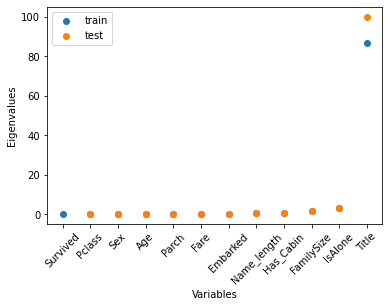

In [36]:
# plot the eigenvalues of the data similar to notebook example

plt.scatter(headers, evals, label = 'train')
plt.scatter(test_headers, test_evals, label = 'test')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.ylabel('Eigenvalues')
plt.legend()
plt.show()

In [37]:
top_evals

array([86.89935721,  3.34369812,  1.51750053])

In [38]:
top_testevals

array([100.15311138,   3.37100746,   1.52261158])

In conclusion, we ran PCA on both the test set and the train set and got similar results. The 'Title' variable seems to have the highest feature importance by a far margin, using eigenvalues and indicators for importance. PC2 and PC3 are 'IsAlone' and 'FamilySize', respectively. This contrasts with several of the plots from the kaggle notebook, although 'Title' was somewhat higher importance on a couple of plots.